In [1]:
import csv
import math as m
l1 = 50
l2 = 40
l3 = 20
with open('robot3b.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['tt1','tt2','tt3','Px', 'Py'])
    for tt1 in range (-180 , 180,2):
        for tt2 in range (-180, 180,2):
            for phi in range (0,180,2):
                tt1 = (tt1*m.pi)/180
                tt2 = (tt2*m.pi)/180
                phi = (phi*m.pi)/180
                tt3=phi-tt1-tt2
                Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2) + l3*m.cos(tt1 + tt2 + tt3)
                Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2) + l3*m.sin(tt1 + tt2 + tt3)
                writer.writerow([tt1,tt2,tt3,Px,Py])

In [3]:
import pandas as pd
data=pd.read_csv('robot3b.csv')
data

,tt1,tt2,tt3,Px,Py
0,-3.141593e+00,-3.141593e+00,6.283185,10.000000,3.673940e-15
1,-5.483114e-02,-5.483114e-02,0.144569,109.672399,-6.419898e+00
2,-9.569838e-04,-9.569838e-04,0.071727,109.951185,1.270722e+00
3,-1.670252e-05,-1.670252e-05,0.104753,109.890438,2.088398e+00
4,-2.915140e-07,-2.915140e-07,0.139627,109.805361,2.783424e+00
...,...,...,...,...,...
2915995,0.000000e+00,1.126869e-149,2.967060,70.303845,3.472964e+00
2915996,0.000000e+00,1.966758e-151,3.001966,70.194639,2.783462e+00
2915997,0.000000e+00,3.432641e-153,3.036873,70.109562,2.090569e+00
2915998,0.000000e+00,5.991088e-155,3.071779,70.048719,1.395129e+00


In [4]:
x=data.drop(data.columns[:3],axis=1)
x

,Px,Py
0,10.000000,3.673940e-15
1,109.672399,-6.419898e+00
2,109.951185,1.270722e+00
3,109.890438,2.088398e+00
4,109.805361,2.783424e+00
...,...,...
2915995,70.303845,3.472964e+00
2915996,70.194639,2.783462e+00
2915997,70.109562,2.090569e+00
2915998,70.048719,1.395129e+00


In [5]:
y=data.drop(data.columns[3:],axis=1)
y

,tt1,tt2,tt3
0,-3.141593e+00,-3.141593e+00,6.283185
1,-5.483114e-02,-5.483114e-02,0.144569
2,-9.569838e-04,-9.569838e-04,0.071727
3,-1.670252e-05,-1.670252e-05,0.104753
4,-2.915140e-07,-2.915140e-07,0.139627
...,...,...,...
2915995,0.000000e+00,1.126869e-149,2.967060
2915996,0.000000e+00,1.966758e-151,3.001966
2915997,0.000000e+00,3.432641e-153,3.036873
2915998,0.000000e+00,5.991088e-155,3.071779


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout #Dropout: gia tri dung xu li
model=Sequential()
model.add(Dense(30,activation='relu',input_shape=(2,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                90        
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy']) #mse: sai so binh phuong trung binh
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
13669/13669 [==============================] - 37s 3ms/step - loss: 0.3923 - accuracy: 0.9941 - val_loss: 0.3909 - val_accuracy: 0.9948
Epoch 2/10
13669/13669 [==============================] - 32s 2ms/step - loss: 0.3922 - accuracy: 0.9939 - val_loss: 0.3908 - val_accuracy: 0.9948
Epoch 3/10
13669/13669 [==============================] - 28s 2ms/step - loss: 0.3916 - accuracy: 0.9943 - val_loss: 0.3904 - val_accuracy: 0.9948
Epoch 4/10
13669/13669 [==============================] - 28s 2ms/step - loss: 0.3914 - accuracy: 0.9942 - val_loss: 0.3903 - val_accuracy: 0.9948
Epoch 5/10
13669/13669 [==============================] - 26s 2ms/step - loss: 0.3912 - accuracy: 0.9943 - val_loss: 0.3902 - val_accuracy: 0.9950
Epoch 6/10
13669/13669 [==============================] - 28s 2ms/step - loss: 0.3912 - accuracy: 0.9943 - val_loss: 0.3902 - val_accuracy: 0.9949
Epoch 7/10
13669/13669 [==============================] - 27s 2ms/step - loss: 0.3912 - accuracy: 0.9943 - val_loss: 0

In [10]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra la:',score[1])

sai so kiem tra la: 0.38846102356910706
do chinh xac kiem tra la: 0.9947489500045776


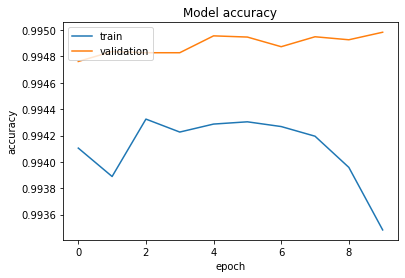

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")

In [12]:
model.save('robot3b.h5')

In [ ]:
from tensorflow.keras.models import load_model
model2=load_model('robot3b.h5')